In [19]:
# Problem 1
# Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression



In [20]:
# Get the file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/cancer.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=['Unnamed: 32'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Prepare features and labels, split data, and initialize metrics
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

max_k = X.shape[1]
accs, precs, recs = [], [], []


In [22]:
# Loop over K components
for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    clf = SVC(kernel='linear')
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred))
    recs.append(recall_score(y_test, y_pred))



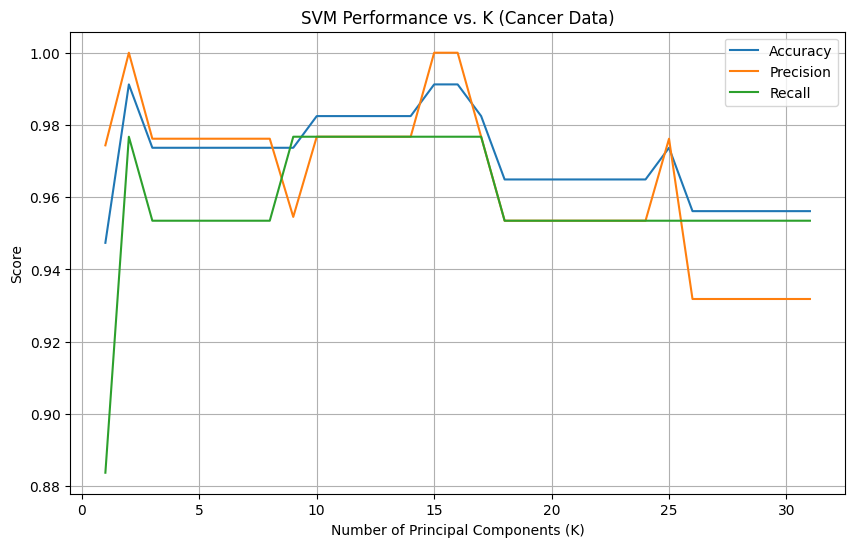

Best K = 2
Kernel: linear
Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767

Kernel: rbf
Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837

Kernel: poly
Accuracy: 0.8860
Precision: 1.0000
Recall: 0.6977

Kernel: sigmoid
Accuracy: 0.9298
Precision: 0.9268
Recall: 0.8837

Logistic Regression Results:
Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767


In [23]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), accs, label='Accuracy')
plt.plot(range(1, max_k + 1), precs, label='Precision')
plt.plot(range(1, max_k + 1), recs, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('SVM Performance vs. K (Cancer Data)')
plt.legend()
plt.grid(True)
plt.show()

best_k = np.argmax(accs) + 1
print(f"Best K = {best_k}")
pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train_pca, y_train)
    preds = model.predict(X_test_pca)
    print(f"Kernel: {k}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}\n")

# Logistic Regression comparison
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)
log_preds = log_model.predict(X_test_pca)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, log_preds):.4f}")
print(f"Precision: {precision_score(y_test, log_preds):.4f}")
print(f"Recall: {recall_score(y_test, log_preds):.4f}")


In [1]:
#Problem 2 (As we are using a different datasets, we start with all the libraries needed like 1)
#Imports the libraries needed, here we're working with SVR regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [2]:
# Get the file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/Housing.csv'
df = pd.read_csv(file_path)

df.replace({'yes': 1, 'no': 0}, inplace=True)  # Encode categorical yes/no to 1/0

# Select features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea']
X = df[features]
y = df['price']


Mounted at /content/drive


/tmp/ipython-input-2-3119052459.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)  # Encode categorical yes/no to 1/0


In [3]:
#Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

max_k = X.shape[1]
r2_scores = []
mse_scores = []

for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    svr = SVR(kernel='linear')
    svr.fit(X_train_pca, y_train)
    preds = svr.predict(X_test_pca)

    r2_scores.append(r2_score(y_test, preds))
    mse_scores.append(mean_squared_error(y_test, preds))


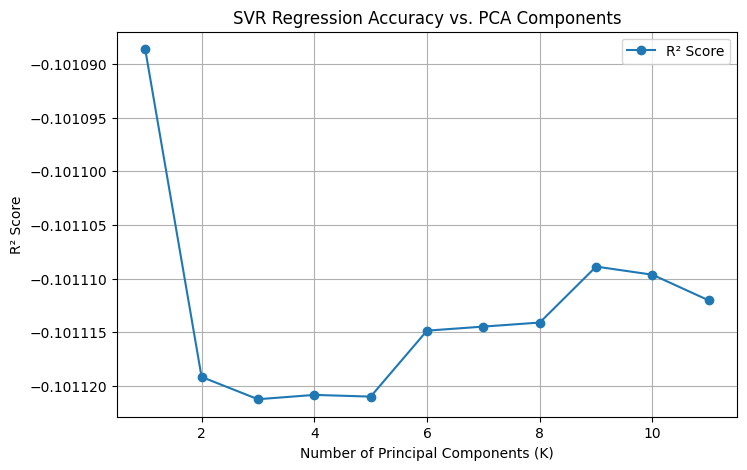

In [4]:
#Plot R^2 vs number of principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), r2_scores, marker='o', label='R² Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('R² Score')
plt.title('SVR Regression Accuracy vs. PCA Components')
plt.grid(True)
plt.legend()
plt.show()


In [5]:

# Best K for kernel comparison, apply PCA again with best k, and try different kernel types
best_k = np.argmax(r2_scores) + 1
print(f"Best K = {best_k} (R² Score = {r2_scores[best_k - 1]:.4f})")

pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_pca, y_train)
    preds = svr.predict(X_test_pca)

    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    print(f"\nKernel: {kernel}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")


Best K = 1 (R² Score = -0.1011)

Kernel: linear
R² Score: -0.1011
MSE: 5565529829709.58

Kernel: rbf
R² Score: -0.1015
MSE: 5567791111827.70

Kernel: poly
R² Score: -0.1002
MSE: 5561004227667.68

Kernel: sigmoid
R² Score: -0.1015
MSE: 5567485852748.11


In [6]:
# Compare with Ridge Regression (regularized linear regression)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_pca, y_train)
ridge_preds = ridge.predict(X_test_pca)

ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)

print("\n🔍 Ridge Regression (Baseline Comparison):")
print(f"R² Score: {ridge_r2:.4f}")
print(f"MSE: {ridge_mse:.2f}")


🔍 Ridge Regression (Baseline Comparison):
R² Score: 0.6259
MSE: 1890795539574.50
